In [1]:
import pandas as pd

uri = 'data/projects.csv'
dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
mapa = {
    'expected_hours':'horas_esperadas',
    'price':'preco',
    'unfinished':'nao_finalizado',
}
dados.rename(columns=mapa, inplace=True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# Cria um coluna finalizado invertendo os valores de nao_finalizado
troca = {
    0: 1,
    1: 0
}
dados['finalizado'] = dados['nao_finalizado'].map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


### Plotando os dados

In [4]:
import seaborn as sns


#### Gráficos de dispersão (ou Scatter plot)
São representações gráficas do relacionamento entre duas variáveis numéricas. O Scatter plot utiliza pontos para representar essa relação, cada ponto representa o valor de uma variável no eixo horizontal e o valor de outra variável no eixo vertical.

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

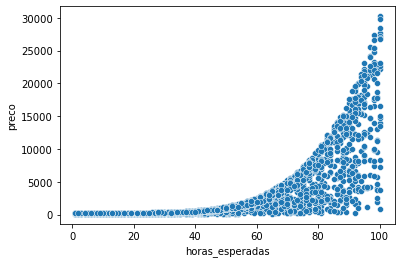

In [5]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

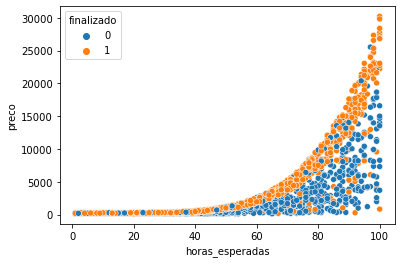

In [6]:

# hue vai colorir os pontos baseado em relação aos dados da coluna finalizado
sns.scatterplot(x='horas_esperadas', y='preco', data=dados, hue="finalizado")

### Gráfico Relativo

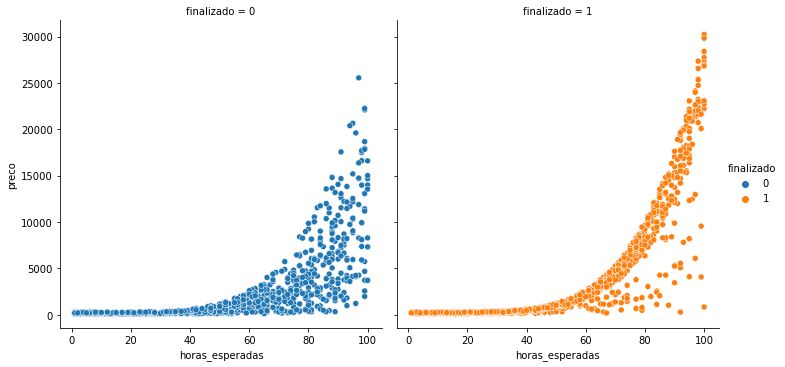

In [7]:
sns.relplot(x='horas_esperadas', y='preco', data=dados, col="finalizado", hue="finalizado")

### Construindo o Modelo

In [8]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Preparando dados de treino e teste

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

seed = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size=0.25, stratify=y)

#### Treinando o modelo

In [10]:
model = LinearSVC()
model.fit(treino_x, treino_y)

/home/jrcontabilidade/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

#### Testando o modelo

In [11]:
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)
print(f'A acuracia foi de {(acuracia*100):.2f}%')

A acuracia foi de 47.41%


#### BaseLine (Linha de Base)
Uma linha de base é o resultado de um modelo/solução muito básico. Você geralmente cria uma linha de base e depois tenta fazer soluções mais complexas para obter um resultado melhor. Se você conseguir uma pontuação melhor do que a linha de base, é bom.

In [12]:
import numpy as np
# Nossa linhas de base será o resultado de um algoritmo que sempre retorna 1
previsoes_de_base = np.ones(540)

In [13]:
acuracia_de_base = accuracy_score(teste_y, previsoes_de_base)
print(f'A acuracia foi de {(acuracia_de_base*100):.2f}%')

A acuracia foi de 52.59%


### Curva de Decisão

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

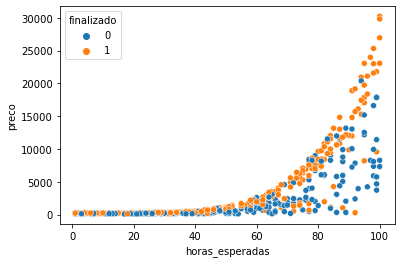

In [14]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)

<ipython-input-26-3fa7350264c6>:18: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, z, alpha=0.1)


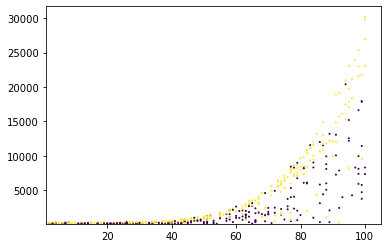

In [26]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [16]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [17]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [18]:
z = model.predict(pontos)
z = z.reshape(xx.shape)

<ipython-input-24-3e9dce38b1a0>:3: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, z)


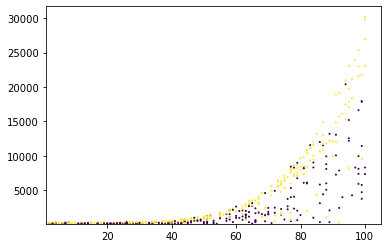

In [24]:
import matplotlib.pyplot as plt

plt.contour(xx, yy, z, alpha=0.1)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)